In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patches as mpatches

In [182]:
#import the data from a csv-file
df = pd.read_csv('data/eda.csv')

In [183]:
# lat-lon location of Seattle city center 47°36′14″N 122°19′48″W
ll_seattle = [47.603889, -121.67]   # [lat, lon]

# define additional data from research as dict
df_zip = np.sort(df.zipcode.unique())

# Define urban/rural grades by ZIP
area_center = {
    98102, 98103, 98105, 98109, 98112, 98115, 98119, 98122, 98144,
}
area_inner = {
    98004, 98005, 98006, 98007, 98008, 98032, 98033, 98034, 98039, 98040, 98055,
    98056, 98059, 98106, 98107, 98108, 98117, 98116, 98118, 98125, 98126, 98133,
    98136, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98199
}
area_outer = {
    98001, 98002, 98003, 98011, 98023, 98027, 98028, 98029, 98030, 98031, 98038,
    98042, 98052, 98053, 98058, 98070, 98072, 98074, 98075, 98092, 
}
area_rural = {
    98010, 98014, 98019, 98022, 98024, 98045, 98065, 98077, 98198
}

# Define car accessibility grades by ZIP
access_good = {
    98001, 98003, 98004, 98005, 98006, 98007, 98008, 98032, 98052, 98102, 98103,
    98105, 98108, 98109, 98119, 98122, 98148
}
access_medium = {
    98027, 98030, 98039, 98055, 98059, 98074, 98002, 98106, 98107, 98112, 98115,
    98118, 98125, 98126, 98133
}
access_low = {
    98022, 98023, 98024, 98029, 98031, 98033, 98034, 98040, 98042, 98045, 98053,
    98056, 98065, 98075, 98077, 98116, 98117, 98136, 98144, 98146, 98166, 98177,
    98178
}
access_min = {
    98010, 98011, 98014, 98019, 98028, 98038, 98058, 98092, 98070, 98072, 98155,
    98168, 98188, 98198, 98199
}

# Define surveillance grades by ZIP
surveil_high = {
    98072, 98102, 98103, 98105, 98106, 98108, 98109, 98133, 98144, 98146, 98148,
    98188
}
surveil_medium = {
    98004, 98005, 98006, 98007, 98008, 98039, 98107, 98199
}
surveil_low = {
    98001, 98002, 98003, 98011, 98027, 98028, 98029, 98030, 98031, 98032, 98033,
    98034, 98038, 98040, 98042, 98052, 98053, 98055, 98056, 98058, 98074, 98075,
    98092, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98136,
    98059, 98065, 98166, 98168
}
surveil_min = {
    98010, 98014, 98019, 98022, 98023, 98024, 98045, 98070, 98077, 98177, 98178,
    98198
}

pd.DataFrame({'zipcode': list(area_center)}).to_csv('data/city_center.csv',index=False)

In [184]:
df_categories = pd.DataFrame(data=df_zip, columns=['zipcode'])
df_categories['geo_area'] = 1
df_categories['accessibility'] = 1
df_categories['surveillance'] = 1

# set neighborhood categories
for i in df_categories['zipcode']:
    if i in area_center:
        pass
    elif i in area_inner:
        df_categories.loc[df_categories['zipcode'] == i, 'geo_area'] = 2
    elif i in area_outer:
        df_categories.loc[df_categories['zipcode'] == i, 'geo_area'] = 3
    else:
        df_categories.loc[df_categories['zipcode'] == i, 'geo_area'] = 4

    if i in access_good:
        pass
    elif i in access_medium:
        df_categories.loc[df_categories['zipcode'] == i, 'accessibility'] = 2
    elif i in access_low:
        df_categories.loc[df_categories['zipcode'] == i, 'accessibility'] = 3
    else:
        df_categories.loc[df_categories['zipcode'] == i, 'accessibility'] = 4

    if i in surveil_high:
        pass
    elif i in surveil_medium:
        df_categories.loc[df_categories['zipcode'] == i, 'surveillance'] = 2
    elif i in surveil_low:
        df_categories.loc[df_categories['zipcode'] == i, 'surveillance'] = 3
    else:
        df_categories.loc[df_categories['zipcode'] == i, 'surveillance'] = 4

# list all zip codes of WA
all_zip = [98052,98105,98092,98115,98023,98103,98003,98042,98034,98133,98118,
    98125,98031,98058,98122,98032,98059,98033,98004,98006,98001,98117,98030,
    98056,98155,98198,98168,98002,98038,98109,98040,98029,98027,98074,98146,
    98144,98007,98072,98011,98188,98008,98107,98106,98178,98116,98075,98108,
    98112,98028,98119,98055,98053,98126,98199,98177,98022,98102,98166,98005,
    98121,98136,98045,98101,98104,98077,98057,98065,98019,98070,98148,98014,
    98354,98051,98010,98024,98047,98151,98134,98039,98158,98195,98288,
    98174,98054,98132,98171,98184,98224,98164,98181,98009,98013,98015,98025,
    98035,98041,98050,98062,98064,98063,98071,98073,98083,98089,98093,98111,
    98113,98114,98124,98127,98131,98129,98139,98138,98141,98145,98154,98160,
    98161,98165,98170,98175,98185,98190,98194,9819]

In [185]:
# prepare dataframe for plotting

# Load ZIP code boundaries for King County
shapefile_path = './data/zip_codes_wa/zip_codes_wa.shp'   # path to map file

zip_shapes = gpd.read_file(shapefile_path)
zip_shapes = zip_shapes[zip_shapes['ZCTA5CE20'].astype(int).isin(all_zip)]
zip_shapes = zip_shapes.rename(columns={'ZCTA5CE20': 'zipcode'})
zip_shapes['zipcode'] = zip_shapes['zipcode'].astype(int)
zip_shapes['zip3'] = zip_shapes['zipcode'].astype(str)
zip_shapes['zip3'] = zip_shapes['zip3'].apply(lambda x: x[-3:])

# swap lat and lon
cols = list(zip_shapes.columns)
a, b = cols.index('INTPTLAT20'), cols.index('INTPTLON20')
cols[b], cols[a] = cols[a], cols[b]
zip_shapes = zip_shapes[cols]

# Merge category data with geospatial data
merged = zip_shapes.merge(df_categories, on='zipcode', how='left')

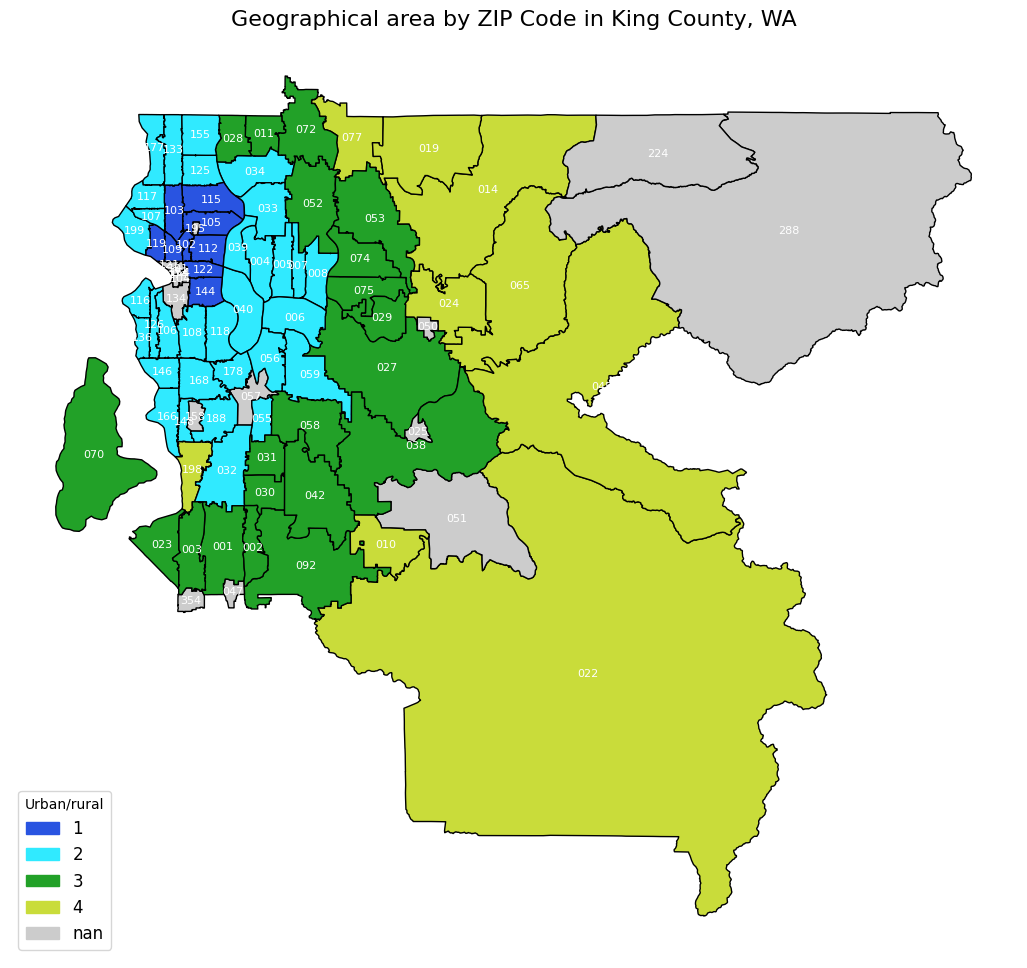

In [186]:
# plot area category map

# Assign fill colors (including gray for NaN)
colors = {
    1: "#2954e1",        # blue
    2: "#30eaff",        # cyan
    3: "#22a128",        # green
    4: "#c9dc3a",        # yellow
    np.nan: '#cccccc'
}

# Plot the map
fig, ax = plt.subplots(figsize=(16, 12))
merged.plot(ax=ax, cmap=None, color=merged['geo_area'].map(colors),
            legend=True, edgecolor='black')

# Add the zip code suffixes as labels
for idx, row in merged.iterrows():
    if row['geometry'].is_empty:
        continue
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['zip3'],
            fontsize=8, ha='center', va='center', color='white')
    
plt.title('Geographical area by ZIP Code in King County, WA', fontsize=16)
plt.axis('off')

# Add custom legend
legend_handles = [mpatches.Patch(color=color, label=label) for label,
                  color in colors.items()]
ax.legend(handles=legend_handles, title='Urban/rural', loc='lower left', fontsize='large')
plt.show()

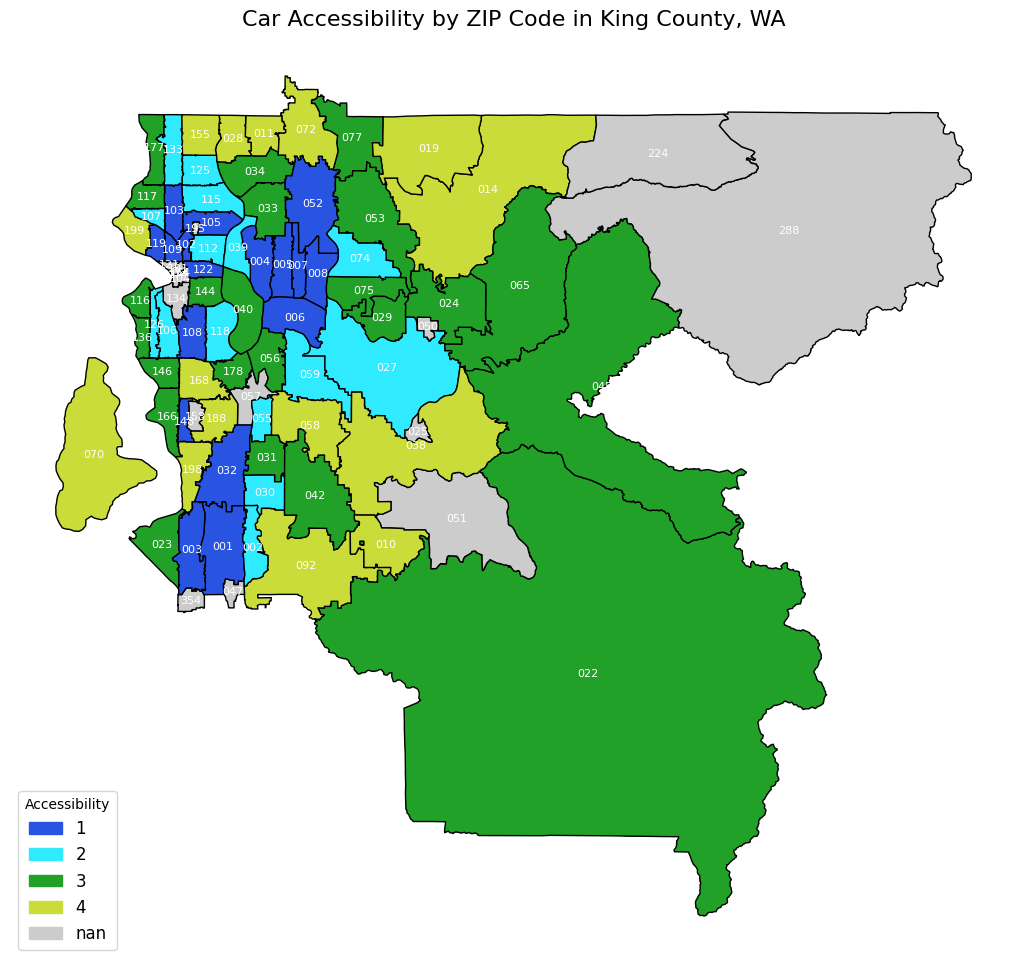

In [187]:
# plot accessibility map

# Assign fill colors (including gray for NaN)
colors = {
    1: "#2954e1",        # blue
    2: "#30eaff",        # cyan
    3: "#22a128",        # green
    4: "#c9dc3a",        # yellow
    np.nan: '#cccccc'
}

# Plot the map
fig, ax = plt.subplots(figsize=(16, 12))
merged.plot(ax=ax, cmap=None, color=merged['accessibility'].map(colors),
            legend=True, edgecolor='black')

# Add the zip code suffixes as labels
for idx, row in merged.iterrows():
    if row['geometry'].is_empty:
        continue
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['zip3'],
            fontsize=8, ha='center', va='center', color='white')
    
plt.title('Car Accessibility by ZIP Code in King County, WA', fontsize=16)
plt.axis('off')

# Add custom legend
legend_handles = [mpatches.Patch(color=color, label=label) for label,
                  color in colors.items()]
ax.legend(handles=legend_handles, title='Accessibility', loc='lower left', fontsize='large')
plt.show()

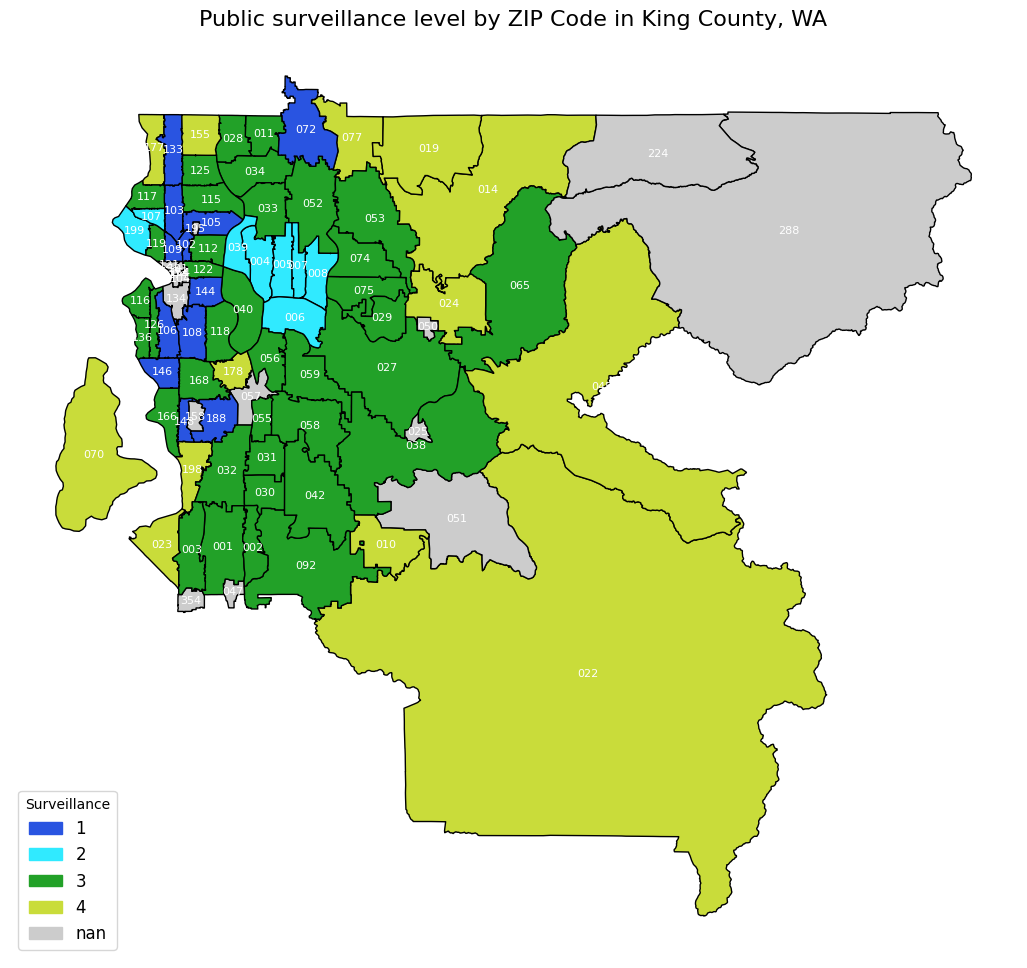

In [188]:
# plot public surveillance map

# Assign fill colors (including gray for NaN)
colors = {
    1: "#2954e1",        # blue
    2: "#30eaff",        # cyan
    3: "#22a128",        # green
    4: "#c9dc3a",        # yellow
    np.nan: '#cccccc'
}

# Plot the map
fig, ax = plt.subplots(figsize=(16, 12))
merged.plot(ax=ax, cmap=None, color=merged['surveillance'].map(colors),
            legend=True, edgecolor='black')

# Add the zip code suffixes as labels
for idx, row in merged.iterrows():
    if row['geometry'].is_empty:
        continue
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['zip3'],
            fontsize=8, ha='center', va='center', color='white')
    
plt.title('Public surveillance level by ZIP Code in King County, WA', fontsize=16)
plt.axis('off')

# Add custom legend
legend_handles = [mpatches.Patch(color=color, label=label) for label,
                  color in colors.items()]
ax.legend(handles=legend_handles, title='Surveillance', loc='lower left', fontsize='large')
plt.show()

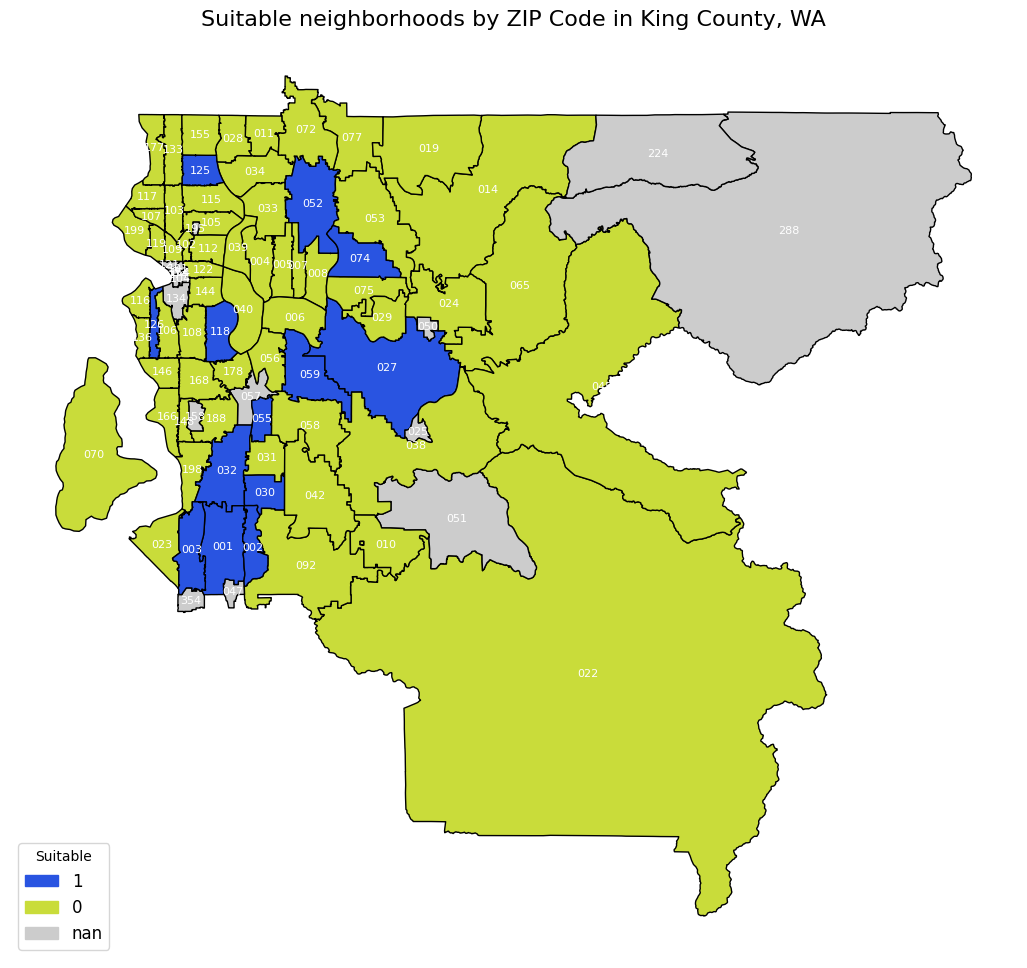

In [189]:
# plot suitable neighborhoods
# area: 2 & 3
# accessibility: 1 & 2
# surveillance: 3 & 4

merged['suitable'] = 1
merged.loc[merged['geo_area'] == 1, 'suitable'] = 0
merged.loc[merged['geo_area'] == 4, 'suitable'] = 0
merged.loc[merged['accessibility'] > 2, 'suitable'] = 0
merged.loc[merged['surveillance'] < 3, 'suitable'] = 0
merged.loc[merged['surveillance'].isna(), 'suitable'] = np.nan

# Assign fill colors (including gray for NaN)
colors = {
    1: "#2954e1",        # blue
    0: "#c9dc3a",        # yellow
    np.nan: '#cccccc'
}

# Plot the map
fig, ax = plt.subplots(figsize=(16, 12))
merged.plot(ax=ax, cmap=None, color=merged['suitable'].map(colors),
            legend=True, edgecolor='black')

# Add the zip code suffixes as labels
for idx, row in merged.iterrows():
    if row['geometry'].is_empty:
        continue
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['zip3'],
            fontsize=8, ha='center', va='center', color='white')
    
plt.title('Suitable neighborhoods by ZIP Code in King County, WA', fontsize=16)
plt.axis('off')

# Add custom legend
legend_handles = [mpatches.Patch(color=color, label=label) for label,
                  color in colors.items()]
ax.legend(handles=legend_handles, title='Suitable', loc='lower left', fontsize='large')
plt.show()

df_suitable = merged.zipcode[merged.suitable == 1]
df_suitable
df_suitable.to_csv('data/suitable.csv',index=False)